In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# current_dir = "/kaggle/input/isic-2024-challenge"

# # List all files in the current directory (excluding subdirectories)
# files_in_dir = [f for f in os.listdir(current_dir)]
# for file in files_in_dir:
#     print(file)

    
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Libraries and dependencies

In [2]:
%%time

!pip install torch==1.13.0 torchvision==0.14.0 torchaudio==0.13.0 --extra-index-url https://download.pytorch.org/whl/cu117
!pip install packaging
!pip install timm==0.4.12
!pip install pytest chardet yacs termcolor
!pip install submitit tensorboardX
!pip install triton==2.0.0
!pip install causal_conv1d==1.0.0  # causal_conv1d-1.0.0+cu118torch1.13cxx11abiFALSE-cp38-cp38-linux_x86_64.whl
!pip install mamba_ssm==1.0.1  # mmamba_ssm-1.0.1+cu118torch1.13cxx11abiFALSE-cp38-cp38-linux_x86_64.whl
!pip install scikit-learn matplotlib thop h5py SimpleITK scikit-image medpy yacs

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 562.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu121
    Uninstalling torch-2.5.1+cu121:
      Successfully uninstalled torch-2.5.1+cu121
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.5.1+cu121
    Uninstalling torchaudio-2.5.1+cu121:
      Successfully uninstalled torchaudio-2.5.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1+cu121
    Uninstalling torchvision-0.20.1+cu121:
      Successfully uninstalled torchvision-0.20.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the so

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import h5py
import cv2
import sys
from tqdm.notebook import tqdm
from concurrent.futures import ThreadPoolExecutor,ProcessPoolExecutor, as_completed
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
import plotly.express as px
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer,KNNImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.feature_extraction import FeatureHasher
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, mean_squared_error,get_scorer_names
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression,SGDClassifier
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.utils.class_weight import compute_class_weight
from imblearn.combine import *
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.pipeline import Pipeline
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import random
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Deep learning keras libraries
import keras
print(keras.__version__)
from keras import backend
from keras.losses import Loss
import tensorflow as tf
from keras.layers import Input, Conv2D, MaxPooling2D,GlobalAveragePooling2D, Flatten, Dense, Dropout, BatchNormalization, Concatenate
from keras import ops
import keras_hub
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import math
from keras import ops
from keras import layers
from keras.saving import register_keras_serializable

3.5.0


In [5]:
import time
import math
from functools import partial
from typing import Optional, Callable
from torch import Tensor
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.checkpoint as checkpoint
import torch.optim as optim
from einops import rearrange, repeat
from timm.models.layers import DropPath, to_2tuple, trunc_normal_
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from tqdm import tqdm
try:
    from mamba_ssm.ops.selective_scan_interface import selective_scan_fn, selective_scan_ref
except:
    pass

# an alternative for mamba_ssm (in which causal_conv1d is needed)
try:
    from selective_scan import selective_scan_fn as selective_scan_fn_v1
    from selective_scan import selective_scan_ref as selective_scan_ref_v1
except:
    pass


DropPath.__repr__ = lambda self: f"timm.DropPath({self.drop_prob})"

In [6]:
import importlib
import pkg_resources

def check_package(package_name, version=None):
    try:
        pkg = importlib.import_module(package_name)
        if version:
            installed_version = pkg_resources.get_distribution(package_name).version
            if installed_version == version:
                print(f"{package_name} {version} is installed.")
            else:
                print(f"{package_name} version mismatch: Installed {installed_version}, Expected {version}.")
        else:
            print(f"{package_name} is installed.")
    except ImportError:
        print(f"{package_name} is NOT installed.")
    except pkg_resources.DistributionNotFound:
        print(f"{package_name} is NOT installed (distribution not found).")

# Define packages with versions
packages = {
    "torch": "1.13.0",
    "torchvision": "0.14.0",
    "torchaudio": "0.13.0",
    "packaging": None,
    "timm": "0.4.12",
    "pytest": None,
    "chardet": None,
    "yacs": None,
    "termcolor": None,
    "submitit": None,
    "tensorboardX": None,
    "triton": "2.0.0",
    "causal_conv1d": "1.0.0",
    "mamba_ssm": "1.0.1",
    "sklearn": None,
    "matplotlib": None,
    "thop": None,
    "h5py": None,
    "SimpleITK": None,
    "scikit-image": None,
    "medpy": None
}

# Check all packages
for pkg, ver in packages.items():
    check_package(pkg, ver)


torch version mismatch: Installed 1.13.0+cu117, Expected 1.13.0.
torchvision version mismatch: Installed 0.14.0+cu117, Expected 0.14.0.
torchaudio version mismatch: Installed 0.13.0+cu117, Expected 0.13.0.
packaging is installed.
timm 0.4.12 is installed.
pytest is installed.
chardet is installed.
yacs is installed.
termcolor is installed.
submitit is installed.
tensorboardX is installed.
triton 2.0.0 is installed.
causal_conv1d 1.0.0 is installed.
mamba_ssm 1.0.1 is installed.
sklearn is installed.
matplotlib is installed.
thop is installed.
h5py is installed.
SimpleITK is installed.
scikit-image is NOT installed.
medpy is installed.


We need to install the following packages apart from the built-in installations

- yacs
- submitit
- tensorboardX
- triton
- casual_conv1d
- mamba_ssm
- thop
- medpy

In [7]:
# %%capture
# # Install required packages in Kaggle
# !pip install yacs
# !pip install submitit
# !pip install tensorboardX
# !pip install triton
# !pip install causal_conv1d  # Ensure correct package name 
# !pip install thop
# !pip install medpy
# !pip install mamba_ssm # mamba ssm and casual conv1d can only be installed with GPU. Not with CPU.


In [8]:
# # Verify installation
# import importlib
# packages = ["yacs", "submitit", "tensorboardX", "triton", "causal_conv1d","thop", "medpy", "mamba_ssm"]

# for pkg in packages:
#     try:
#         importlib.import_module(pkg)
#         print(f"{pkg} is installed successfully.")
#     except ImportError:
#         print(f"Failed to install {pkg}.")

In [9]:
# import time
# import math
# from functools import partial
# from typing import Optional, Callable
# from torch import Tensor
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.utils.checkpoint as checkpoint
# from einops import rearrange, repeat
# from timm.layers import DropPath, to_2tuple, trunc_normal_
# try:
#     from mamba_ssm.ops.selective_scan_interface import selective_scan_fn, selective_scan_ref
# except:
#     pass

# # an alternative for mamba_ssm (in which causal_conv1d is needed)
# try:
#     from selective_scan import selective_scan_fn as selective_scan_fn_v1
#     from selective_scan import selective_scan_ref as selective_scan_ref_v1
# except:
#     pass


In [10]:
import torch
print(torch.version.cuda)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

11.7
True
Tesla P100-PCIE-16GB


In [11]:
print(torch.__version__)

1.13.0+cu117


In [12]:
# CONFIG VARIABLES AND PARAMETERS
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

# DATA
BUFFER_SIZE = 512
BATCH_SIZE = 64
keras.utils.set_random_seed(48)

## Data loading


In [13]:
current_dir = "/kaggle/input/isic-2024-challenge"
sample_submission = pd.read_csv(os.path.join(current_dir,'sample_submission.csv'))
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   isic_id  3 non-null      object 
 1   target   3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 176.0+ bytes


In [14]:
sample_submission.head()

,isic_id,target
0,ISIC_0015657,0.3
1,ISIC_0015729,0.3
2,ISIC_0015740,0.3


In [15]:
train_metadata = pd.read_csv(os.path.join(current_dir,'train-metadata.csv'),low_memory=False)
train_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext                   401059 non-nul

In [16]:
train_metadata.head()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [17]:
test_metadata = pd.read_csv(os.path.join(current_dir,'test-metadata.csv'),low_memory=False)
test_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   isic_id                      3 non-null      object 
 1   patient_id                   3 non-null      object 
 2   age_approx                   3 non-null      float64
 3   sex                          3 non-null      object 
 4   anatom_site_general          3 non-null      object 
 5   clin_size_long_diam_mm       3 non-null      float64
 6   image_type                   3 non-null      object 
 7   tbp_tile_type                3 non-null      object 
 8   tbp_lv_A                     3 non-null      float64
 9   tbp_lv_Aext                  3 non-null      float64
 10  tbp_lv_B                     3 non-null      float64
 11  tbp_lv_Bext                  3 non-null      float64
 12  tbp_lv_C                     3 non-null      float64
 13  tbp_lv_Cext             

In [18]:
test_metadata.head()

,isic_id,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license
0,ISIC_0015657,IP_6074337,45.0,male,posterior torso,2.70,TBP tile: close-up,3D: XP,22.80433,20.007270,...,0.304827,1.281532,2.299935,0.479339,20,-155.06510,1511.222000,113.980100,Memorial Sloan Kettering Cancer Center,CC-BY
1,ISIC_0015729,IP_1664139,35.0,female,lower extremity,2.52,TBP tile: close-up,3D: XP,16.64867,9.657964,...,0.000000,1.271940,2.011223,0.426230,25,-112.36924,629.535889,-15.019287,"Frazer Institute, The University of Queensland...",CC-BY
2,ISIC_0015740,IP_7142616,65.0,male,posterior torso,3.16,TBP tile: close-up,3D: XP,24.25384,19.937380,...,0.230742,1.080308,2.705857,0.366071,110,-84.29282,1303.978000,-28.576050,FNQH Cairns,CC-BY


#### Load Image Byte String

In this competition, images are provided as byte strings. The following code snippet demonstrates how to load these images into memory. One might wonder why the provided jpeg images aren't being used in the /train-image folder for training. This is because testing images are not provided as JPEG images; instead, they are provided as byte strings. Why use byte strings? They occupy significantly less memory compared to np.array representations.


In [19]:
# image sample visualization
training_validation_hdf5 = h5py.File(f"{current_dir}/train-image.hdf5", 'r')
testing_hdf5 = h5py.File(f"{current_dir}/test-image.hdf5", 'r')

Image ISIC_1472148:
Shape:(117, 117, 3)


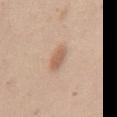

Image ISIC_2153690:
Shape:(131, 131, 3)


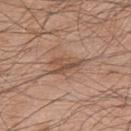

In [20]:
# sample randomly two images from the train dataset
img_sample = train_metadata['isic_id'].sample(n=2).to_list()

# load the image from byte arrays, 
byte_str = [training_validation_hdf5[isic_id][()] for isic_id in img_sample]

# convert byte str to numpy array
img_arr = [np.frombuffer(byte, np.uint8) for byte in byte_str]

# convert cv2 image
img_cv2 = [cv2.imdecode(nparr, cv2.IMREAD_COLOR) for nparr in img_arr] 
for ind,val in enumerate(img_cv2):
    print(f"Image {img_sample[ind]}:")
    print(f"Shape:{val.shape}")
    cv2_imshow(val)

Image ISIC_0015729:
Shape:(125, 125, 3)


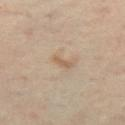

Image ISIC_0015657:
Shape:(141, 141, 3)


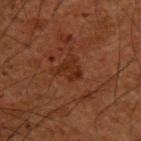

Image ISIC_0015740:
Shape:(119, 119, 3)


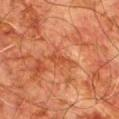

In [21]:
# sample randomly two images from the train dataset
img_sample = test_metadata['isic_id'].sample(n=3).to_list()

# load the image from byte arrays, 
byte_str = [testing_hdf5[isic_id][()] for isic_id in img_sample]

# convert byte str to numpy array
img_arr = [np.frombuffer(byte, np.uint8) for byte in byte_str]

# convert cv2 image
img_cv2 = [cv2.imdecode(nparr, cv2.IMREAD_COLOR) for nparr in img_arr] 
for ind,val in enumerate(img_cv2):
    print(f"Image {img_sample[ind]}:")
    print(f"Shape:{val.shape}")
    cv2_imshow(val)

## Preprocessing 

In [22]:
class DataPreprocessor:
    def __init__(self):
        self.preprocessor = None
        self.train_columns = None

    def fit_transform(self, df):
        """Preprocess training data and store transformations."""
        df = df.copy()
        df = self._drop_irrelevant_columns(df)
        df = self._drop_train_only_columns(df)
        categorical_cols, numerical_cols = self._identify_column_types(df)
        
        # Define preprocessing pipelines
        numerical_pipeline = Pipeline([
            ("imputer", KNNImputer()),
            ("scaler", StandardScaler())
        ])
        
        categorical_pipeline = Pipeline([
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ])
        
        self.preprocessor = ColumnTransformer([
            ("num", numerical_pipeline, numerical_cols),
            ("cat", categorical_pipeline, categorical_cols)
        ])
        
        transformed_data = self.preprocessor.fit_transform(df)
        
        cat_feature_names = self.preprocessor.named_transformers_["cat"].named_steps["onehot"].get_feature_names_out(categorical_cols)
        all_columns = numerical_cols + list(cat_feature_names)
        
        df_processed = pd.DataFrame(transformed_data, columns=all_columns)
        df_processed["isic_id"] = df["isic_id"].values
        df_processed["target"] = df["target"].values
        
        self.train_columns = df_processed.columns  # Store train columns
        return df_processed

    def transform(self, df):
        """Preprocess test data using stored transformations from training."""
        df = df.copy()
        df = self._drop_irrelevant_columns(df)
        
        transformed_data = self.preprocessor.transform(df)
        cat_feature_names = self.preprocessor.named_transformers_["cat"].named_steps["onehot"].get_feature_names_out()
        all_columns = self.train_columns[:-2]  # Exclude 'isic_id' and 'target'
        
        df_processed = pd.DataFrame(transformed_data, columns=all_columns)
        df_processed["isic_id"] = df["isic_id"].values
        # df_processed["target"] = df["target"].values
        
        # Align test dataset with train columns
        df_processed = self._align_train_test_columns(df_processed)
        return df_processed

    def _drop_irrelevant_columns(self, df):
        """Remove unnecessary columns."""
        return df.drop(columns=['patient_id','image_type', 'tbp_tile_type', 'attribution', 'copyright_license'], errors="ignore")

    def _drop_train_only_columns(self,df):
        """Remove columns that are present only in the train set and not in the test set"""
        drop_train_only_columns = [
            'lesion_id', 'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
            'mel_mitotic_index', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence'
            ]
        return df.drop(columns=drop_train_only_columns,errors='ignore')
        

    def _identify_column_types(self, df):
        """Identify categorical and numerical columns, excluding 'isic_id' and 'target'."""
        categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = [col for col in categorical_cols if col != "isic_id"]
        numerical_cols = [col for col in numerical_cols if col != "target"]
        return categorical_cols, numerical_cols
    
    def _align_train_test_columns(self, df):
        """Ensure test data has the same columns as train data."""
        train_cols = list(self.train_columns)
        train_cols.remove('target')
        missing_cols = set(train_cols) - set(df.columns)
        for col in missing_cols:
            df[col] = 0
        return df[train_cols]


In [23]:
train_metadata = pd.read_csv(os.path.join(current_dir, 'train-metadata.csv'), low_memory=False)
test_metadata = pd.read_csv(os.path.join(current_dir, 'test-metadata.csv'), low_memory=False)

In [24]:
data_object = DataPreprocessor()
train_metadata_processed = data_object.fit_transform(train_metadata)
test_metadata_processed = data_object.transform(test_metadata)
# train_metadata_processed = train_metadata.ffill().bfill()
# test_metadata_processed = test_metadata.ffill().bfill()

In [25]:
X_train = train_metadata_processed.drop(columns=['target'])
y_train = train_metadata_processed['target']
X_test = test_metadata_processed.copy()

In [26]:
X_train_final = X_train.copy()
y_train_final = y_train.copy()

In [27]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 73 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   age_approx                               401059 non-null  float64
 1   clin_size_long_diam_mm                   401059 non-null  float64
 2   tbp_lv_A                                 401059 non-null  float64
 3   tbp_lv_Aext                              401059 non-null  float64
 4   tbp_lv_B                                 401059 non-null  float64
 5   tbp_lv_Bext                              401059 non-null  float64
 6   tbp_lv_C                                 401059 non-null  float64
 7   tbp_lv_Cext                              401059 non-null  float64
 8   tbp_lv_H                                 401059 non-null  float64
 9   tbp_lv_Hext                              401059 non-null  float64
 10  tbp_lv_L                        

In [28]:
y_train_final.info()

<class 'pandas.core.series.Series'>
RangeIndex: 401059 entries, 0 to 401058
Series name: target
Non-Null Count   Dtype
--------------   -----
401059 non-null  int64
dtypes: int64(1)
memory usage: 3.1 MB


In [29]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 73 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age_approx                               3 non-null      float64
 1   clin_size_long_diam_mm                   3 non-null      float64
 2   tbp_lv_A                                 3 non-null      float64
 3   tbp_lv_Aext                              3 non-null      float64
 4   tbp_lv_B                                 3 non-null      float64
 5   tbp_lv_Bext                              3 non-null      float64
 6   tbp_lv_C                                 3 non-null      float64
 7   tbp_lv_Cext                              3 non-null      float64
 8   tbp_lv_H                                 3 non-null      float64
 9   tbp_lv_Hext                              3 non-null      float64
 10  tbp_lv_L                                 3 non-null   

In [30]:
X_test.head()

,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,...,tbp_lv_location_Unknown,tbp_lv_location_simple_Head & Neck,tbp_lv_location_simple_Left Arm,tbp_lv_location_simple_Left Leg,tbp_lv_location_simple_Right Arm,tbp_lv_location_simple_Right Leg,tbp_lv_location_simple_Torso Back,tbp_lv_location_simple_Torso Front,tbp_lv_location_simple_Unknown,isic_id
0,-0.959062,-0.706128,0.707672,1.441620,0.019401,0.029138,0.284448,0.562959,-0.621776,-1.330179,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,ISIC_0015657
1,-1.696232,-0.809394,-0.831441,-1.490710,0.575110,0.136361,0.119378,-0.362720,1.331464,1.716605,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,ISIC_0015729
2,0.515280,-0.442225,1.070096,1.421817,0.413357,0.328180,0.727544,0.779689,-0.575811,-1.079823,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,ISIC_0015740


In [31]:
print("original_ratio:",y_train_final.value_counts()[1]/y_train_final.value_counts()[0])

original_ratio: 0.0009808668566836218


## Handling class imbalance

In [32]:
def resampler_data(X, Y):
    
    # Apply undersampling only on numerical data
    resampler = RandomUnderSampler(sampling_strategy=0.1,)
    X_resampled, Y_resampled = resampler.fit_resample(X,Y)
    
    # now apply over sampling for the minorit class
    resampler = RandomOverSampler(sampling_strategy=0.2)
    X_resampled, Y_resampled = resampler.fit_resample(X_resampled, Y_resampled)

    print("X_final shape;",X_resampled.shape)
    print("Y_final shape:",Y_resampled.shape)
    
    return X_resampled, Y_resampled

In [33]:
X_train_final, y_train_final = resampler_data(X_train_final, y_train_final)

X_final shape; (4716, 73)
Y_final shape: (4716,)


In [34]:
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_final, y_train_final, test_size=0.1, stratify=y_train_final, random_state = 63
)

## Dataset input pipeline

In [35]:
# Path to images
image_dir = '/kaggle/input/isic-2024-challenge/train-image/image'
# # Separate features and target
# tabular_features = tr_v2.drop(columns=['isic_id', 'target'])
# targets = tr_v2['target']

In [36]:
# # generating the train and val data

# def stratified_split(X, y, patient_col='patient_id', test_size=0.2, random_state=42):
#     """Create stratified split ensuring no patient_id overlap between sets"""
#     patient_targets = pd.DataFrame({
#         'patient_id': X[patient_col],
#         'target': y
#     }).drop_duplicates()
    
#     train_patients, val_patients = train_test_split(
#         patient_targets['patient_id'].unique(),
#         test_size=test_size,
#         random_state=random_state,
#         stratify=patient_targets.groupby('patient_id')['target'].first()
#     )
    
#     train_mask = X[patient_col].isin(train_patients)
#     val_mask = X[patient_col].isin(val_patients)
    
#     return X[train_mask], X[val_mask], y[train_mask], y[val_mask]

In [37]:
# # Perform the split
# X_train_final, X_val, y_train_final, y_val = stratified_split(
#     X_train_resampled, Y_train_resampled
# )

In [38]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4244 entries, 296 to 3741
Data columns (total 73 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age_approx                               4244 non-null   float64
 1   clin_size_long_diam_mm                   4244 non-null   float64
 2   tbp_lv_A                                 4244 non-null   float64
 3   tbp_lv_Aext                              4244 non-null   float64
 4   tbp_lv_B                                 4244 non-null   float64
 5   tbp_lv_Bext                              4244 non-null   float64
 6   tbp_lv_C                                 4244 non-null   float64
 7   tbp_lv_Cext                              4244 non-null   float64
 8   tbp_lv_H                                 4244 non-null   float64
 9   tbp_lv_Hext                              4244 non-null   float64
 10  tbp_lv_L                                 4244 non-n

In [39]:
y_train_final.value_counts()

target
0    3537
1     707
Name: count, dtype: int64

In [40]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472 entries, 3622 to 3887
Data columns (total 73 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age_approx                               472 non-null    float64
 1   clin_size_long_diam_mm                   472 non-null    float64
 2   tbp_lv_A                                 472 non-null    float64
 3   tbp_lv_Aext                              472 non-null    float64
 4   tbp_lv_B                                 472 non-null    float64
 5   tbp_lv_Bext                              472 non-null    float64
 6   tbp_lv_C                                 472 non-null    float64
 7   tbp_lv_Cext                              472 non-null    float64
 8   tbp_lv_H                                 472 non-null    float64
 9   tbp_lv_Hext                              472 non-null    float64
 10  tbp_lv_L                                 472 non-nu

In [41]:
y_val.value_counts()

target
0    393
1     79
Name: count, dtype: int64

## Pytorch dataloader

In [42]:

# Image transformation pipeline
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((IMAGE_HEIGHT, IMAGE_WIDTH)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

# Function to load image bytes from HDF5
def load_image_bytes(isic_id):
    with h5py.File('/kaggle/input/isic-2024-challenge/train-image.hdf5', "r") as hdf5_file:
        return hdf5_file[isic_id][()]

# Custom PyTorch Dataset class
class ISICDataset(Dataset):
    def __init__(self, X, Y, hdf5_path):
        self.tabular_data = X.drop(columns=['isic_id']).values.astype(np.float32)
        self.targets = Y.values.astype(np.int32).reshape(-1, 1)
        self.isic_ids = X['isic_id'].astype(str).values
        self.hdf5_path = hdf5_path
        
        # Preload images in parallel
        self.imgs = [None] * len(self.isic_ids)
        with ProcessPoolExecutor(max_workers=8) as executor:
            future_to_index = {executor.submit(load_image_bytes, isic_id): i for i, isic_id in enumerate(self.isic_ids)}
            for future in tqdm(future_to_index, desc="Loading training images"):
                i = future_to_index[future]
                self.imgs[i] = future.result()
    
    def __len__(self):
        return len(self.isic_ids)
    
    def __getitem__(self, idx):
        # Load image from preloaded bytes
        img_array = np.frombuffer(self.imgs[idx], dtype=np.uint8)
        img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)  # Decode as a 3-channel image (H, W, C)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        img = transform(img)
        
        # Tabular data
        tabular = torch.tensor(self.tabular_data[idx], dtype=torch.float32)
        
        # Target label
        target = torch.tensor(self.targets[idx], dtype=torch.int64)
        
        return {"images": img, "tabular": tabular}, target

# Function to create DataLoader
def create_dataloader(X, Y, batch_size=32, num_workers=4):
    dataset = ISICDataset(X, Y, '/kaggle/input/isic-2024-challenge/train-image.hdf5')
    return DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)


In [43]:
train_dataloader = create_dataloader(X_train_final,y_train_final,BATCH_SIZE)
val_dataloader = create_dataloader(X_val,y_val,BATCH_SIZE)

Loading training images: 100%|██████████| 472/472 [00:00<00:00, 1757.02it/s]


In [44]:
# Image transformation pipeline
transform_test = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((IMAGE_HEIGHT, IMAGE_WIDTH)),
    transforms.ToTensor(),
])

# Function to load image bytes from HDF5
def load_image_bytes(isic_id):
    with h5py.File('/kaggle/input/isic-2024-challenge/test-image.hdf5', "r") as hdf5_file:
        return hdf5_file[isic_id][()]

# Custom PyTorch Dataset class for test data
class ISICTestDataset(Dataset):
    def __init__(self, df, hdf5_path):
        self.tabular_data = df.drop(columns=['isic_id']).values.astype(np.float32)
        self.isic_ids = df['isic_id'].astype(str).values
        self.hdf5_path = hdf5_path
        
        # Preload images in parallel
        self.imgs = [None] * len(self.isic_ids)
        with ProcessPoolExecutor(max_workers=8) as executor:
            future_to_index = {executor.submit(load_image_bytes, isic_id): i for i, isic_id in enumerate(self.isic_ids)}
            for future in tqdm(future_to_index, desc="Loading testing images"):
                i = future_to_index[future]
                self.imgs[i] = future.result()
    
    def __len__(self):
        return len(self.isic_ids)
    
    def __getitem__(self, idx):
        # Load image from preloaded bytes
        img_array = np.frombuffer(self.imgs[idx], dtype=np.uint8)
        img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)  # Decode as a 3-channel image (H, W, C)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        img = transform_test(img)
        
        # Tabular data
        tabular = torch.tensor(self.tabular_data[idx], dtype=torch.float32)
        
        return {"images": img, "tabular": tabular}

# Function to create DataLoader for test data
def create_test_dataloader(df, batch_size=32, num_workers=4):
    dataset = ISICTestDataset(df, '/kaggle/input/isic-2024-challenge/test-image.hdf5')
    return DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

In [45]:
test_dataloader = create_test_dataloader(X_test,BATCH_SIZE)

Loading testing images: 100%|██████████| 3/3 [00:00<00:00, 360.40it/s]


In [46]:
def inspect_batch(dataloader,train=True):
    if(train):
        for batch in dataloader:
            dict1,labels = batch
            images = dict1['images']
            tabular = dict1['tabular']
            
            print(f"Image batch shape: {images.shape}")
            print(f"Tabular data shape: {tabular.shape}")
            print(f"Labels shape: {labels.shape}")
            print(f"\nData types:")
            print(f"Images dtype: {images.dtype}")
            print(f"Tabular dtype: {tabular.dtype}")
            
            print(f"\nValue ranges:")
            print(f"Images: (min={images.min().item():.2f}, max={images.max().item():.2f})")
            print(f"Tabular: (min={tabular.min().item():.2f}, max={tabular.max().item():.2f})")
            
            break

    else:
        for batch in dataloader:
            dict1 = batch["images"]
            tabular = batch["tabular"]
            
            print(f"Image batch shape: {dict1.shape}")
            print(f"Tabular data shape: {tabular.shape}")
            
            print(f"\nData types:")
            print(f"Images dtype: {dict1.dtype}")
            print(f"Tabular dtype: {tabular.dtype}")
            
            print(f"\nValue ranges:")
            print(f"Images: (min={dict1.min().item():.2f}, max={dict1.max().item():.2f})")
            print(f"Tabular: (min={tabular.min().item():.2f}, max={tabular.max().item():.2f})")
            
            break

In [47]:
inspect_batch(train_dataloader)

Image batch shape: torch.Size([64, 3, 224, 224])
Tabular data shape: torch.Size([64, 72])
Labels shape: torch.Size([64, 1])

Data types:
Images dtype: torch.float32
Tabular dtype: torch.float32

Value ranges:
Images: (min=0.00, max=1.00)
Tabular: (min=-4.22, max=8.57)


In [48]:
inspect_batch(test_dataloader,False)

Image batch shape: torch.Size([3, 3, 224, 224])
Tabular data shape: torch.Size([3, 72])

Data types:
Images dtype: torch.float32
Tabular dtype: torch.float32

Value ranges:
Images: (min=0.01, max=0.98)
Tabular: (min=-1.70, max=1.72)


## Model definition  

In [49]:
os.environ["KERAS_BACKEND"] = "torch"

In [50]:
def flops_selective_scan_ref(B=1, L=256, D=768, N=16, with_D=True, with_Z=False, with_Group=True, with_complex=False):
    """
    u: r(B D L)
    delta: r(B D L)
    A: r(D N)
    B: r(B N L)
    C: r(B N L)
    D: r(D)
    z: r(B D L)
    delta_bias: r(D), fp32
    
    ignores:
        [.float(), +, .softplus, .shape, new_zeros, repeat, stack, to(dtype), silu] 
    """
    import numpy as np
    
    # fvcore.nn.jit_handles
    def get_flops_einsum(input_shapes, equation):
        np_arrs = [np.zeros(s) for s in input_shapes]
        optim = np.einsum_path(equation, *np_arrs, optimize="optimal")[1]
        for line in optim.split("\n"):
            if "optimized flop" in line.lower():
                # divided by 2 because we count MAC (multiply-add counted as one flop)
                flop = float(np.floor(float(line.split(":")[-1]) / 2))
                return flop
    

    assert not with_complex

    flops = 0 # below code flops = 0
    if False:
        ...
        """
        dtype_in = u.dtype
        u = u.float()
        delta = delta.float()
        if delta_bias is not None:
            delta = delta + delta_bias[..., None].float()
        if delta_softplus:
            delta = F.softplus(delta)
        batch, dim, dstate = u.shape[0], A.shape[0], A.shape[1]
        is_variable_B = B.dim() >= 3
        is_variable_C = C.dim() >= 3
        if A.is_complex():
            if is_variable_B:
                B = torch.view_as_complex(rearrange(B.float(), "... (L two) -> ... L two", two=2))
            if is_variable_C:
                C = torch.view_as_complex(rearrange(C.float(), "... (L two) -> ... L two", two=2))
        else:
            B = B.float()
            C = C.float()
        x = A.new_zeros((batch, dim, dstate))
        ys = []
        """

    flops += get_flops_einsum([[B, D, L], [D, N]], "bdl,dn->bdln")
    if with_Group:
        flops += get_flops_einsum([[B, D, L], [B, N, L], [B, D, L]], "bdl,bnl,bdl->bdln")
    else:
        flops += get_flops_einsum([[B, D, L], [B, D, N, L], [B, D, L]], "bdl,bdnl,bdl->bdln")
    if False:
        ...
        """
        deltaA = torch.exp(torch.einsum('bdl,dn->bdln', delta, A))
        if not is_variable_B:
            deltaB_u = torch.einsum('bdl,dn,bdl->bdln', delta, B, u)
        else:
            if B.dim() == 3:
                deltaB_u = torch.einsum('bdl,bnl,bdl->bdln', delta, B, u)
            else:
                B = repeat(B, "B G N L -> B (G H) N L", H=dim // B.shape[1])
                deltaB_u = torch.einsum('bdl,bdnl,bdl->bdln', delta, B, u)
        if is_variable_C and C.dim() == 4:
            C = repeat(C, "B G N L -> B (G H) N L", H=dim // C.shape[1])
        last_state = None
        """
    
    in_for_flops = B * D * N   
    if with_Group:
        in_for_flops += get_flops_einsum([[B, D, N], [B, D, N]], "bdn,bdn->bd")
    else:
        in_for_flops += get_flops_einsum([[B, D, N], [B, N]], "bdn,bn->bd")
    flops += L * in_for_flops 
    if False:
        ...
        """
        for i in range(u.shape[2]):
            x = deltaA[:, :, i] * x + deltaB_u[:, :, i]
            if not is_variable_C:
                y = torch.einsum('bdn,dn->bd', x, C)
            else:
                if C.dim() == 3:
                    y = torch.einsum('bdn,bn->bd', x, C[:, :, i])
                else:
                    y = torch.einsum('bdn,bdn->bd', x, C[:, :, :, i])
            if i == u.shape[2] - 1:
                last_state = x
            if y.is_complex():
                y = y.real * 2
            ys.append(y)
        y = torch.stack(ys, dim=2) # (batch dim L)
        """

    if with_D:
        flops += B * D * L
    if with_Z:
        flops += B * D * L
    if False:
        ...
        """
        out = y if D is None else y + u * rearrange(D, "d -> d 1")
        if z is not None:
            out = out * F.silu(z)
        out = out.to(dtype=dtype_in)
        """
    
    return flops


In [51]:

class PatchEmbed2D(nn.Module):
    r""" Image to Patch Embedding
    Args:
        patch_size (int): Patch token size. Default: 4.
        in_chans (int): Number of input image channels. Default: 3.
        embed_dim (int): Number of linear projection output channels. Default: 96.
        norm_layer (nn.Module, optional): Normalization layer. Default: None
    """
    def __init__(self, patch_size=4, in_chans=3, embed_dim=96, norm_layer=None, **kwargs):
        super().__init__()
        if isinstance(patch_size, int):
            patch_size = (patch_size, patch_size)
        self.proj = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)
        if norm_layer is not None:
            self.norm = norm_layer(embed_dim)
        else:
            self.norm = None

    def forward(self, x):
        x = self.proj(x).permute(0, 2, 3, 1)
        if self.norm is not None:
            x = self.norm(x)
        return x


In [52]:

class PatchMerging2D(nn.Module):
    r""" Patch Merging Layer.
    Args:
        input_resolution (tuple[int]): Resolution of input feature.
        dim (int): Number of input channels.
        norm_layer (nn.Module, optional): Normalization layer.  Default: nn.LayerNorm
    """

    def __init__(self, dim, norm_layer=nn.LayerNorm):
        super().__init__()
        self.dim = dim
        self.reduction = nn.Linear(4 * dim, 2 * dim, bias=False)
        self.norm = norm_layer(4 * dim)

    def forward(self, x):
        B, H, W, C = x.shape

        SHAPE_FIX = [-1, -1]
        if (W % 2 != 0) or (H % 2 != 0):
            print(f"Warning, x.shape {x.shape} is not match even ===========", flush=True)
            SHAPE_FIX[0] = H // 2
            SHAPE_FIX[1] = W // 2

        x0 = x[:, 0::2, 0::2, :]  # B H/2 W/2 C
        x1 = x[:, 1::2, 0::2, :]  # B H/2 W/2 C
        x2 = x[:, 0::2, 1::2, :]  # B H/2 W/2 C
        x3 = x[:, 1::2, 1::2, :]  # B H/2 W/2 C

        if SHAPE_FIX[0] > 0:
            x0 = x0[:, :SHAPE_FIX[0], :SHAPE_FIX[1], :]
            x1 = x1[:, :SHAPE_FIX[0], :SHAPE_FIX[1], :]
            x2 = x2[:, :SHAPE_FIX[0], :SHAPE_FIX[1], :]
            x3 = x3[:, :SHAPE_FIX[0], :SHAPE_FIX[1], :]
        
        x = torch.cat([x0, x1, x2, x3], -1)  # B H/2 W/2 4*C
        x = x.view(B, H//2, W//2, 4 * C)  # B H/2*W/2 4*C

        x = self.norm(x)
        x = self.reduction(x)

        return x


In [53]:

class PatchExpand2D(nn.Module):
    def __init__(self, dim, dim_scale=2, norm_layer=nn.LayerNorm):
        super().__init__()
        self.dim = dim*2
        self.dim_scale = dim_scale
        self.expand = nn.Linear(self.dim, dim_scale*self.dim, bias=False)
        self.norm = norm_layer(self.dim // dim_scale)

    def forward(self, x):
        B, H, W, C = x.shape
        x = self.expand(x)

        x = rearrange(x, 'b h w (p1 p2 c)-> b (h p1) (w p2) c', p1=self.dim_scale, p2=self.dim_scale, c=C//self.dim_scale)
        x= self.norm(x)

        return x


In [54]:
class Final_PatchExpand2D(nn.Module):
    def __init__(self, dim, dim_scale=4, norm_layer=nn.LayerNorm):
        super().__init__()
        self.dim = dim
        self.dim_scale = dim_scale
        self.expand = nn.Linear(self.dim, dim_scale*self.dim, bias=False)
        self.norm = norm_layer(self.dim // dim_scale)

    def forward(self, x):
        B, H, W, C = x.shape
        x = self.expand(x)

        x = rearrange(x, 'b h w (p1 p2 c)-> b (h p1) (w p2) c', p1=self.dim_scale, p2=self.dim_scale, c=C//self.dim_scale)
        x= self.norm(x)

        return x


In [55]:

class SS2D(nn.Module):
    def __init__(
        self,
        d_model,
        d_state=16,
        # d_state="auto", # 20240109
        d_conv=3,
        expand=2,
        dt_rank="auto",
        dt_min=0.001,
        dt_max=0.1,
        dt_init="random",
        dt_scale=1.0,
        dt_init_floor=1e-4,
        dropout=0.,
        conv_bias=True,
        bias=False,
        device=None,
        dtype=None,
        **kwargs,
    ):
        factory_kwargs = {"device": device, "dtype": dtype}
        super().__init__()
        self.d_model = d_model
        self.d_state = d_state
        # self.d_state = math.ceil(self.d_model / 6) if d_state == "auto" else d_model # 20240109
        self.d_conv = d_conv
        self.expand = expand
        self.d_inner = int(self.expand * self.d_model)
        self.dt_rank = math.ceil(self.d_model / 16) if dt_rank == "auto" else dt_rank

        self.in_proj = nn.Linear(self.d_model, self.d_inner * 2, bias=bias, **factory_kwargs)
        self.conv2d = nn.Conv2d(
            in_channels=self.d_inner,
            out_channels=self.d_inner,
            groups=self.d_inner,
            bias=conv_bias,
            kernel_size=d_conv,
            padding=(d_conv - 1) // 2,
            **factory_kwargs,
        )
        self.act = nn.SiLU()

        self.x_proj = (
            nn.Linear(self.d_inner, (self.dt_rank + self.d_state * 2), bias=False, **factory_kwargs), 
            nn.Linear(self.d_inner, (self.dt_rank + self.d_state * 2), bias=False, **factory_kwargs), 
            nn.Linear(self.d_inner, (self.dt_rank + self.d_state * 2), bias=False, **factory_kwargs), 
            nn.Linear(self.d_inner, (self.dt_rank + self.d_state * 2), bias=False, **factory_kwargs), 
        )
        self.x_proj_weight = nn.Parameter(torch.stack([t.weight for t in self.x_proj], dim=0)) # (K=4, N, inner)
        del self.x_proj

        self.dt_projs = (
            self.dt_init(self.dt_rank, self.d_inner, dt_scale, dt_init, dt_min, dt_max, dt_init_floor, **factory_kwargs),
            self.dt_init(self.dt_rank, self.d_inner, dt_scale, dt_init, dt_min, dt_max, dt_init_floor, **factory_kwargs),
            self.dt_init(self.dt_rank, self.d_inner, dt_scale, dt_init, dt_min, dt_max, dt_init_floor, **factory_kwargs),
            self.dt_init(self.dt_rank, self.d_inner, dt_scale, dt_init, dt_min, dt_max, dt_init_floor, **factory_kwargs),
        )
        self.dt_projs_weight = nn.Parameter(torch.stack([t.weight for t in self.dt_projs], dim=0)) # (K=4, inner, rank)
        self.dt_projs_bias = nn.Parameter(torch.stack([t.bias for t in self.dt_projs], dim=0)) # (K=4, inner)
        del self.dt_projs
        
        self.A_logs = self.A_log_init(self.d_state, self.d_inner, copies=4, merge=True) # (K=4, D, N)
        self.Ds = self.D_init(self.d_inner, copies=4, merge=True) # (K=4, D, N)

        # self.selective_scan = selective_scan_fn
        self.forward_core = self.forward_corev0

        self.out_norm = nn.LayerNorm(self.d_inner)
        self.out_proj = nn.Linear(self.d_inner, self.d_model, bias=bias, **factory_kwargs)
        self.dropout = nn.Dropout(dropout) if dropout > 0. else None

    @staticmethod
    def dt_init(dt_rank, d_inner, dt_scale=1.0, dt_init="random", dt_min=0.001, dt_max=0.1, dt_init_floor=1e-4, **factory_kwargs):
        dt_proj = nn.Linear(dt_rank, d_inner, bias=True, **factory_kwargs)

        # Initialize special dt projection to preserve variance at initialization
        dt_init_std = dt_rank**-0.5 * dt_scale
        if dt_init == "constant":
            nn.init.constant_(dt_proj.weight, dt_init_std)
        elif dt_init == "random":
            nn.init.uniform_(dt_proj.weight, -dt_init_std, dt_init_std)
        else:
            raise NotImplementedError

        # Initialize dt bias so that F.softplus(dt_bias) is between dt_min and dt_max
        dt = torch.exp(
            torch.rand(d_inner, **factory_kwargs) * (math.log(dt_max) - math.log(dt_min))
            + math.log(dt_min)
        ).clamp(min=dt_init_floor)
        # Inverse of softplus: https://github.com/pytorch/pytorch/issues/72759
        inv_dt = dt + torch.log(-torch.expm1(-dt))
        with torch.no_grad():
            dt_proj.bias.copy_(inv_dt)
        # Our initialization would set all Linear.bias to zero, need to mark this one as _no_reinit
        dt_proj.bias._no_reinit = True
        
        return dt_proj

    @staticmethod
    def A_log_init(d_state, d_inner, copies=1, device=None, merge=True):
        # S4D real initialization
        A = repeat(
            torch.arange(1, d_state + 1, dtype=torch.float32, device=device),
            "n -> d n",
            d=d_inner,
        ).contiguous()
        A_log = torch.log(A)  # Keep A_log in fp32
        if copies > 1:
            A_log = repeat(A_log, "d n -> r d n", r=copies)
            if merge:
                A_log = A_log.flatten(0, 1)
        A_log = nn.Parameter(A_log)
        A_log._no_weight_decay = True
        return A_log

    @staticmethod
    def D_init(d_inner, copies=1, device=None, merge=True):
        # D "skip" parameter
        D = torch.ones(d_inner, device=device)
        if copies > 1:
            D = repeat(D, "n1 -> r n1", r=copies)
            if merge:
                D = D.flatten(0, 1)
        D = nn.Parameter(D)  # Keep in fp32
        D._no_weight_decay = True
        return D

    def forward_corev0(self, x: torch.Tensor):
        self.selective_scan = selective_scan_fn
        
        B, C, H, W = x.shape
        L = H * W
        K = 4

        x_hwwh = torch.stack([x.view(B, -1, L), torch.transpose(x, dim0=2, dim1=3).contiguous().view(B, -1, L)], dim=1).view(B, 2, -1, L)
        xs = torch.cat([x_hwwh, torch.flip(x_hwwh, dims=[-1])], dim=1) # (b, k, d, l)

        x_dbl = torch.einsum("b k d l, k c d -> b k c l", xs.view(B, K, -1, L), self.x_proj_weight)
        # x_dbl = x_dbl + self.x_proj_bias.view(1, K, -1, 1)
        dts, Bs, Cs = torch.split(x_dbl, [self.dt_rank, self.d_state, self.d_state], dim=2)
        dts = torch.einsum("b k r l, k d r -> b k d l", dts.view(B, K, -1, L), self.dt_projs_weight)
        # dts = dts + self.dt_projs_bias.view(1, K, -1, 1)

        xs = xs.float().view(B, -1, L) # (b, k * d, l)
        dts = dts.contiguous().float().view(B, -1, L) # (b, k * d, l)
        Bs = Bs.float().view(B, K, -1, L) # (b, k, d_state, l)
        Cs = Cs.float().view(B, K, -1, L) # (b, k, d_state, l)
        Ds = self.Ds.float().view(-1) # (k * d)
        As = -torch.exp(self.A_logs.float()).view(-1, self.d_state)  # (k * d, d_state)
        dt_projs_bias = self.dt_projs_bias.float().view(-1) # (k * d)

        out_y = self.selective_scan(
            xs, dts, 
            As, Bs, Cs, Ds, z=None,
            delta_bias=dt_projs_bias,
            delta_softplus=True,
            return_last_state=False,
        ).view(B, K, -1, L)
        assert out_y.dtype == torch.float

        inv_y = torch.flip(out_y[:, 2:4], dims=[-1]).view(B, 2, -1, L)
        wh_y = torch.transpose(out_y[:, 1].view(B, -1, W, H), dim0=2, dim1=3).contiguous().view(B, -1, L)
        invwh_y = torch.transpose(inv_y[:, 1].view(B, -1, W, H), dim0=2, dim1=3).contiguous().view(B, -1, L)

        return out_y[:, 0], inv_y[:, 0], wh_y, invwh_y

    # an alternative to forward_corev1
    def forward_corev1(self, x: torch.Tensor):
        self.selective_scan = selective_scan_fn_v1

        B, C, H, W = x.shape
        L = H * W
        K = 4

        x_hwwh = torch.stack([x.view(B, -1, L), torch.transpose(x, dim0=2, dim1=3).contiguous().view(B, -1, L)], dim=1).view(B, 2, -1, L)
        xs = torch.cat([x_hwwh, torch.flip(x_hwwh, dims=[-1])], dim=1) # (b, k, d, l)

        x_dbl = torch.einsum("b k d l, k c d -> b k c l", xs.view(B, K, -1, L), self.x_proj_weight)
        # x_dbl = x_dbl + self.x_proj_bias.view(1, K, -1, 1)
        dts, Bs, Cs = torch.split(x_dbl, [self.dt_rank, self.d_state, self.d_state], dim=2)
        dts = torch.einsum("b k r l, k d r -> b k d l", dts.view(B, K, -1, L), self.dt_projs_weight)
        # dts = dts + self.dt_projs_bias.view(1, K, -1, 1)

        xs = xs.float().view(B, -1, L) # (b, k * d, l)
        dts = dts.contiguous().float().view(B, -1, L) # (b, k * d, l)
        Bs = Bs.float().view(B, K, -1, L) # (b, k, d_state, l)
        Cs = Cs.float().view(B, K, -1, L) # (b, k, d_state, l)
        Ds = self.Ds.float().view(-1) # (k * d)
        As = -torch.exp(self.A_logs.float()).view(-1, self.d_state)  # (k * d, d_state)
        dt_projs_bias = self.dt_projs_bias.float().view(-1) # (k * d)

        out_y = self.selective_scan(
            xs, dts, 
            As, Bs, Cs, Ds,
            delta_bias=dt_projs_bias,
            delta_softplus=True,
        ).view(B, K, -1, L)
        assert out_y.dtype == torch.float

        inv_y = torch.flip(out_y[:, 2:4], dims=[-1]).view(B, 2, -1, L)
        wh_y = torch.transpose(out_y[:, 1].view(B, -1, W, H), dim0=2, dim1=3).contiguous().view(B, -1, L)
        invwh_y = torch.transpose(inv_y[:, 1].view(B, -1, W, H), dim0=2, dim1=3).contiguous().view(B, -1, L)

        return out_y[:, 0], inv_y[:, 0], wh_y, invwh_y

    def forward(self, x: torch.Tensor, **kwargs):
        B, H, W, C = x.shape

        xz = self.in_proj(x)
        x, z = xz.chunk(2, dim=-1) # (b, h, w, d)

        x = x.permute(0, 3, 1, 2).contiguous()
        x = self.act(self.conv2d(x)) # (b, d, h, w)
        y1, y2, y3, y4 = self.forward_core(x)
        assert y1.dtype == torch.float32
        y = y1 + y2 + y3 + y4
        y = torch.transpose(y, dim0=1, dim1=2).contiguous().view(B, H, W, -1)
        y = self.out_norm(y)
        y = y * F.silu(z)
        out = self.out_proj(y)
        if self.dropout is not None:
            out = self.dropout(out)
        return out


In [56]:

def channel_shuffle(x: Tensor, groups: int) -> Tensor:

    batch_size, height, width, num_channels = x.size()
    channels_per_group = num_channels // groups

    # reshape
    # [batch_size, num_channels, height, width] -> [batch_size, groups, channels_per_group, height, width]
    x = x.view(batch_size, height, width, groups, channels_per_group)

    x = torch.transpose(x, 3, 4).contiguous()

    # flatten
    x = x.view(batch_size, height, width, -1)

    return x


In [57]:

class SS_Conv_SSM(nn.Module):
    def __init__(
        self,
        hidden_dim: int = 0,
        drop_path: float = 0,
        norm_layer: Callable[..., torch.nn.Module] = partial(nn.LayerNorm, eps=1e-6),
        attn_drop_rate: float = 0,
        d_state: int = 16,
        **kwargs,
    ):
        super().__init__()
        self.ln_1 = norm_layer(hidden_dim//2)
        self.self_attention = SS2D(d_model=hidden_dim//2, dropout=attn_drop_rate, d_state=d_state, **kwargs)
        self.drop_path = DropPath(drop_path)

        self.conv33conv33conv11 = nn.Sequential(
            nn.BatchNorm2d(hidden_dim // 2),
            nn.Conv2d(in_channels=hidden_dim//2,out_channels=hidden_dim//2,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(hidden_dim//2),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_dim // 2, out_channels=hidden_dim // 2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(hidden_dim // 2),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_dim // 2, out_channels=hidden_dim // 2, kernel_size=1, stride=1),
            nn.ReLU()
        )
        # self.finalconv11 = nn.Conv2d(in_channels=hidden_dim, out_channels=hidden_dim, kernel_size=1, stride=1)
    def forward(self, input: torch.Tensor):
        input_left, input_right = input.chunk(2,dim=-1)
        x = self.drop_path(self.self_attention(self.ln_1(input_right)))
        input_left = input_left.permute(0,3,1,2).contiguous()
        input_left = self.conv33conv33conv11(input_left)
        input_left = input_left.permute(0,2,3,1).contiguous()
        output = torch.cat((input_left,x),dim=-1)
        output = channel_shuffle(output,groups=2)
        return output+input


In [58]:

class VSSLayer(nn.Module):
    """ A basic Swin Transformer layer for one stage.
    Args:
        dim (int): Number of input channels.
        depth (int): Number of blocks.
        drop (float, optional): Dropout rate. Default: 0.0
        attn_drop (float, optional): Attention dropout rate. Default: 0.0
        drop_path (float | tuple[float], optional): Stochastic depth rate. Default: 0.0
        norm_layer (nn.Module, optional): Normalization layer. Default: nn.LayerNorm
        downsample (nn.Module | None, optional): Downsample layer at the end of the layer. Default: None
        use_checkpoint (bool): Whether to use checkpointing to save memory. Default: False.
    """

    def __init__(
        self, 
        dim, 
        depth, 
        attn_drop=0.,
        drop_path=0., 
        norm_layer=nn.LayerNorm, 
        downsample=None, 
        use_checkpoint=False, 
        d_state=16,
        **kwargs,
    ):
        super().__init__()
        self.dim = dim
        self.use_checkpoint = use_checkpoint

        self.blocks = nn.ModuleList([
            SS_Conv_SSM(
                hidden_dim=dim,
                drop_path=drop_path[i] if isinstance(drop_path, list) else drop_path,
                norm_layer=norm_layer,
                attn_drop_rate=attn_drop,
                d_state=d_state,
            )
            for i in range(depth)])
        
        if True: # is this really applied? Yes, but been overriden later in VSSM!
            def _init_weights(module: nn.Module):
                for name, p in module.named_parameters():
                    if name in ["out_proj.weight"]:
                        p = p.clone().detach_() # fake init, just to keep the seed ....
                        nn.init.kaiming_uniform_(p, a=math.sqrt(5))
            self.apply(_init_weights)

        if downsample is not None:
            self.downsample = downsample(dim=dim, norm_layer=norm_layer)
        else:
            self.downsample = None


    def forward(self, x):
        for blk in self.blocks:
            if self.use_checkpoint:
                x = checkpoint.checkpoint(blk, x)
            else:
                x = blk(x)
        
        if self.downsample is not None:
            x = self.downsample(x)

        return x
    


class VSSLayer_up(nn.Module):
    """ A basic Swin Transformer layer for one stage.
    Args:
        dim (int): Number of input channels.
        depth (int): Number of blocks.
        drop (float, optional): Dropout rate. Default: 0.0
        attn_drop (float, optional): Attention dropout rate. Default: 0.0
        drop_path (float | tuple[float], optional): Stochastic depth rate. Default: 0.0
        norm_layer (nn.Module, optional): Normalization layer. Default: nn.LayerNorm
        downsample (nn.Module | None, optional): Downsample layer at the end of the layer. Default: None
        use_checkpoint (bool): Whether to use checkpointing to save memory. Default: False.
    """

    def __init__(
        self, 
        dim, 
        depth, 
        attn_drop=0.,
        drop_path=0., 
        norm_layer=nn.LayerNorm, 
        upsample=None, 
        use_checkpoint=False, 
        d_state=16,
        **kwargs,
    ):
        super().__init__()
        self.dim = dim
        self.use_checkpoint = use_checkpoint

        self.blocks = nn.ModuleList([
            SS_Conv_SSM(
                hidden_dim=dim,
                drop_path=drop_path[i] if isinstance(drop_path, list) else drop_path,
                norm_layer=norm_layer,
                attn_drop_rate=attn_drop,
                d_state=d_state,
            )
            for i in range(depth)])
        
        if True: # is this really applied? Yes, but been overriden later in VSSM!
            def _init_weights(module: nn.Module):
                for name, p in module.named_parameters():
                    if name in ["out_proj.weight"]:
                        p = p.clone().detach_() # fake init, just to keep the seed ....
                        nn.init.kaiming_uniform_(p, a=math.sqrt(5))
            self.apply(_init_weights)

        if upsample is not None:
            self.upsample = upsample(dim=dim, norm_layer=norm_layer)
        else:
            self.upsample = None


    def forward(self, x):
        if self.upsample is not None:
            x = self.upsample(x)
        for blk in self.blocks:
            if self.use_checkpoint:
                x = checkpoint.checkpoint(blk, x)
            else:
                x = blk(x)
        return x


In [59]:

class VSSM(nn.Module):
    def __init__(self, patch_size=4, in_chans=3, num_classes=1000, depths=[2, 2, 4, 2], depths_decoder=[2, 9, 2, 2],
                 dims=[96,192,384,768], dims_decoder=[768, 384, 192, 96], d_state=16, drop_rate=0., attn_drop_rate=0., drop_path_rate=0.1,
                 norm_layer=nn.LayerNorm, patch_norm=True,
                 use_checkpoint=False, **kwargs):
        super().__init__()
        self.num_classes = num_classes
        self.num_layers = len(depths)
        if isinstance(dims, int):
            dims = [int(dims * 2 ** i_layer) for i_layer in range(self.num_layers)]
        self.embed_dim = dims[0]
        self.num_features = dims[-1]
        self.dims = dims

        self.patch_embed = PatchEmbed2D(patch_size=patch_size, in_chans=in_chans, embed_dim=self.embed_dim,
            norm_layer=norm_layer if patch_norm else None)

        # WASTED absolute position embedding ======================
        self.ape = False
        # self.ape = False
        # drop_rate = 0.0
        if self.ape:
            self.patches_resolution = self.patch_embed.patches_resolution
            self.absolute_pos_embed = nn.Parameter(torch.zeros(1, *self.patches_resolution, self.embed_dim))
            trunc_normal_(self.absolute_pos_embed, std=.02)
        self.pos_drop = nn.Dropout(p=drop_rate)

        dpr = [x.item() for x in torch.linspace(0, drop_path_rate, sum(depths))]  # stochastic depth decay rule
        dpr_decoder = [x.item() for x in torch.linspace(0, drop_path_rate, sum(depths_decoder))][::-1]

        self.layers = nn.ModuleList()
        for i_layer in range(self.num_layers):
            layer = VSSLayer(
                dim=dims[i_layer],
                depth=depths[i_layer],
                d_state=math.ceil(dims[0] / 6) if d_state is None else d_state, # 20240109
                drop=drop_rate, 
                attn_drop=attn_drop_rate,
                drop_path=dpr[sum(depths[:i_layer]):sum(depths[:i_layer + 1])],
                norm_layer=norm_layer,
                downsample=PatchMerging2D if (i_layer < self.num_layers - 1) else None,
                use_checkpoint=use_checkpoint,
            )
            self.layers.append(layer)


        # self.norm = norm_layer(self.num_features)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.head = nn.Linear(self.num_features, num_classes) if num_classes > 0 else nn.Identity()

        self.apply(self._init_weights)
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
    def _init_weights(self, m: nn.Module):
        """
        out_proj.weight which is previously initilized in SS_Conv_SSM, would be cleared in nn.Linear
        no fc.weight found in the any of the model parameters
        no nn.Embedding found in the any of the model parameters
        so the thing is, SS_Conv_SSM initialization is useless
        
        Conv2D is not intialized !!!
        """
        if isinstance(m, nn.Linear):
            trunc_normal_(m.weight, std=.02)
            if isinstance(m, nn.Linear) and m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.LayerNorm):
            nn.init.constant_(m.bias, 0)
            nn.init.constant_(m.weight, 1.0)

    @torch.jit.ignore
    def no_weight_decay(self):
        return {'absolute_pos_embed'}

    @torch.jit.ignore
    def no_weight_decay_keywords(self):
        return {'relative_position_bias_table'}

    def forward_backbone(self, x):
        x = self.patch_embed(x)
        if self.ape:
            x = x + self.absolute_pos_embed
        x = self.pos_drop(x)

        for layer in self.layers:
            x = layer(x)
        return x

    def forward(self, x):
        x = self.forward_backbone(x)
        x = x.permute(0,3,1,2)
        x = self.avgpool(x)
        x = torch.flatten(x,start_dim=1)
        x = self.head(x)
        return x


## model training

In [60]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("using {} device.".format(device))

# net = VSSM(depths=[2, 2, 4, 2],dims=[96,192,384,768],num_classes=2).to(device)
# data = torch.randn(1,3,224,224).to(device)
# print(net(data).shape)

using cuda:0 device.


In [61]:
net = VSSM(num_classes=6).to(device)

# Load the state dictionary
state_dict = torch.load('/kaggle/input/medmamba/pytorch/pad-ufes-20/1/MedMamba.pth',map_location=device)
net.load_state_dict(state_dict)

net.head = nn.Linear(net.num_features, 2).to(device)  # 2 output classes for binary classification

# # Freeze all layers except the final classification layer
# for param in net.parameters():
#     param.requires_grad = False  # Freeze all layers

# for param in net.head.parameters():
#     param.requires_grad = True  # Unfreeze only the final layer

In [62]:
%%time 
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_final), y=y_train_final)
class_weights_dict = dict(enumerate(class_weights))
# class_weights = {0:0.8,1:10.0}
print("Class Weights:", class_weights_dict)
loss_function = nn.CrossEntropyLoss(weight=torch.tensor(class_weights).float().to(device))
optimizer = optim.Adam(net.parameters(), lr=0.0001,weight_decay=0.00001)

epochs = 50
best_acc = 0.0
best_val_loss = 1000.0
save_path = './{}Net.pth'.format('isicmedmamba')
train_steps = len(train_dataloader)
val_num = len(y_val)
for epoch in range(epochs):
    # train
    net.train()
    running_loss = 0.0
    train_bar = tqdm(train_dataloader, file=sys.stdout)
    for step, data in enumerate(train_bar):
        dict1,labels = data
        images = dict1['images']
        tabular = dict1['tabular']

        optimizer.zero_grad()
        outputs = net(images.to(device))
        loss = loss_function(outputs, labels.flatten().to(device))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        train_bar.desc = "train epoch[{}/{}] loss:{:.3f}".format(epoch + 1,
                                                                 epochs,
                                                                 loss)

    # validate
    net.eval()
    criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights).float().to(device))  # Define the loss function
    acc = 0.0  # accumulate accurate number / epoch
    val_loss = 0.0  # Accumulate validation loss
    with torch.no_grad():
        val_bar = tqdm(val_dataloader, file=sys.stdout)
        for val_data in val_bar:
            val_dict, val_labels = val_data
            val_images = val_dict['images']
            outputs = net(val_images.to(device))
            # Compute loss
            val_loss_temp = criterion(outputs, val_labels.flatten().to(device))
            val_loss += val_loss_temp.item() * val_images.size(0)  # Multiply by batch size for total loss

            predict_y = torch.argmax(outputs, dim=1)
            acc += torch.eq(predict_y, val_labels.to(device)).sum().item()

    val_accurate = acc / val_num
    val_avg_loss = val_loss / val_num
    print('[epoch %d] train_loss: %.6f  val_accuracy: %.2f  val_loss: %.6f' %
          (epoch + 1, running_loss / train_steps, val_accurate, val_avg_loss))

    if val_avg_loss <= best_val_loss:
        best_val_loss = val_avg_loss
        torch.save(net.state_dict(), save_path)

print('Finished Training')


Class Weights: {0: 0.599943454905287, 1: 3.0014144271570014}
100%|██████████| 8/8 [00:01<00:00,  4.87it/s]
[epoch 1] train_loss: 0.466745  val_accuracy: 44.94  val_loss: 0.563953
100%|██████████| 8/8 [00:01<00:00,  4.56it/s]
[epoch 2] train_loss: 0.419645  val_accuracy: 47.26  val_loss: 0.611898
100%|██████████| 8/8 [00:01<00:00,  4.63it/s]
[epoch 3] train_loss: 0.355026  val_accuracy: 40.49  val_loss: 0.413251
100%|██████████| 8/8 [00:01<00:00,  4.96it/s]
[epoch 4] train_loss: 0.310533  val_accuracy: 43.89  val_loss: 0.471690
100%|██████████| 8/8 [00:01<00:00,  4.80it/s]
[epoch 5] train_loss: 0.276402  val_accuracy: 43.67  val_loss: 0.412767
100%|██████████| 8/8 [00:01<00:00,  4.83it/s]
[epoch 6] train_loss: 0.239026  val_accuracy: 47.50  val_loss: 0.719073
100%|██████████| 8/8 [00:01<00:00,  4.66it/s]
[epoch 7] train_loss: 0.192750  val_accuracy: 44.96  val_loss: 0.478447
100%|██████████| 8/8 [00:01<00:00,  4.86it/s]
[epoch 8] train_loss: 0.185984  val_accuracy: 46.20  val_loss: 0.52

In [63]:
torch.cuda.empty_cache()

In [64]:
del net

In [65]:
import gc
gc.collect()

730

### FUNCTIONAL API MODEL DEFINITION

In [66]:
# # lr_schedule = keras.optimizers.schedules.ExponentialDecay(
# #     initial_learning_rate=1e-2,
# #     decay_steps=5000,
# #     decay_rate=0.9)
# boundaries = [300,1000]
# values = [1e-3,1e-4,1e-5]
# lr_schedule = keras.optimizers.schedules.PiecewiseConstantDecay(
#     boundaries, values, name="PiecewiseConstant"
# )
# model.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=lr_schedule,weight_decay=1e-6),
#     loss = keras.losses.BinaryFocalCrossentropy(apply_class_balancing=True,alpha=0.4,gamma=2.0,label_smoothing = 0.1),
#     # loss = keras.losses.BinaryCrossentropy(),
#     metrics=[keras.metrics.AUC(curve='PR', name='PR_pAUC'),keras.metrics.AUC(curve='ROC', name='ROC_pAUC')]
# )

In [67]:
# # Define callbacks
# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     mode='min',
#     patience=10, 
#     restore_best_weights=True,
#     start_from_epoch = 5
# )

# # reduce_lr = ReduceLROnPlateau(
# #     monitor='loss', 
# #     factor=0.2, 
# #     patience=3, 
# #     min_lr=1e-6,
# #     start_from_epoch = 2 
# # )

# checkpoint = ModelCheckpoint(
#     filepath='best_model.keras', 
#     monitor='val_loss', 
#     save_best_only=True
# )


In [68]:
# class_weights = compute_class_weight('balanced', classes=np.unique(y_train_final), y=y_train_final)
# class_weights = dict(enumerate(class_weights))
# # class_weights = {0:0.8,1:10.0}
# print("Class Weights:", class_weights)

In [69]:
# history = model.fit(
#         train_dataset,
#         validation_data=val_dataset,
#         epochs=152,
#         callbacks=[early_stopping, checkpoint],
#         verbose=1,
#         # class_weight=class_weights
#     )

In [70]:
# plt.figure(figsize=(12, 8))

# # Plot training and validation loss
# plt.subplot(2, 1, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# # Plot training and validation AUC
# plt.subplot(2, 1, 2)
# plt.plot(history.history['PR_pAUC'], label='Training PR_AUC')
# plt.plot(history.history['val_PR_pAUC'], label='Validation PR_AUC')
# plt.plot(history.history['ROC_pAUC'], label='Training ROC_AUC')
# plt.plot(history.history['val_ROC_pAUC'], label='Validation ROC_AUC')
# plt.title('AUC')
# plt.xlabel('Epochs')
# plt.ylabel('AUC')
# plt.legend()

# plt.tight_layout()
# plt.show()


## Prediction for test data

In [71]:
# # # now load the best model
# custom_objects = {}
# # best_model = keras.models.load_model('best_model.keras', custom_objects=custom_objects)
# best_model = keras.models.load_model('/kaggle/input/mobilevit/keras/v4/1/best_model_mobilevit_v4.keras')

In [72]:
model = VSSM(num_classes=2).to(device)

# Load the state dictionary
state_dict = torch.load('/kaggle/working/isicmedmambaNet.pth')
model.load_state_dict(state_dict)


<All keys matched successfully>

In [73]:
# Set the model to evaluation mode (if needed)
model.eval()
predict_y = pd.Series()
with torch.no_grad():
        test_bar = tqdm(test_dataloader, file=sys.stdout)
        for test_data in test_bar:
            test_dict = test_data
            test_images = test_dict['images']
            outputs = model(test_images.to(device))
            probs = torch.softmax(outputs, dim=1)
            # Extract class 1 probabilities
            class_1_probs = probs[:, 1].to('cpu')
        
            # Append the probabilities to the Series
            predict_y = pd.concat([predict_y,pd.Series(class_1_probs.numpy())],ignore_index=True)


100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


In [74]:
predict_y[:5]

0    0.004643
1    0.010478
2    0.003708
dtype: float32

In [75]:
# predictions = best_model.predict(test_dataset, verbose=1)
# predictions_series = pd.Series(predictions.flatten(), name='Predictions')
predictions_series = predict_y.clip(lower=1e-6, upper=0.999999)
# prediction_series = pd.Series([np.random.rand() for i in range(len(X_test['isic_id']))])

In [76]:
sub_df = pd.concat([X_test['isic_id'],predictions_series],axis=1)
sub_df.columns = ['isic_id','target']
sub_df.head()

,isic_id,target
0,ISIC_0015657,0.004643
1,ISIC_0015729,0.010478
2,ISIC_0015740,0.003708


In [77]:
 sub_df.to_csv('submission.csv', index=False)